# Investigating if Taking the Test Preparation Course improves Student performance

## Introduction

**In this project, The objective of this analysis is to uncover actionable insights from the student performance data that will help improve overall academic outcomes at XYZ School, in particular, exploring the efficiency of the Test Preparation Course.**  Additionally, we aim to discern which demographic groups of students may benefit the most from this intervention.We will aim to answer:
 
---

I - What is the effect of taking the test preparation course on overall performance?

II - Are there specific student characteristics that influence the effectiveness of the course? Which demographic groups benefit most from the intervention?

III - Does the efficiency of the test preparation course vary across different subjects (mathematics, reading, writing)?

## Dataset

The dataset we'll use for this analysis contains information on student performance across multiple subjects.

**Columns**


| Column                        | Description                                              |
|-------------------------------|----------------------------------------------------------|
| `gender`                      | Gender of the students (categorical: 'male' or 'female'). |
| `parental_level_of_education`  | Educational attainment of the students' parents (categorical: e.g., 'high school', 'some college', etc.). |
| `lunch`                       | Type of lunch received by the students (categorical: 'standard' or 'free/reduced'). |
| `Test Preparation Course`      | Whether the student completed a test preparation course (binary: 'completed' or 'not completed'). |
| `math_score`                  | Score achieved in the mathematics assessment (numerical). |
| `reading_score`               | Score attained in the reading assessment (numerical). |
| `writing_score`               | Score obtained in the writing assessment (numerical). |


Dataset link: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams


## Imports and Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from matplotlib.ticker import FuncFormatter
print('Imports successful')

Imports successful


In [2]:
# Custom styling for seaborn visualizations
custom_params = {"axes.spines.right": False, "axes.spines.top": False,'lines.linewidth': 1.9}
sns.set_theme(style="ticks", rc=custom_params)

In [3]:
def percent_formatter(x, pos):
    return f'{x}%'

In [4]:
# Loading in dataset
student_data = pd.read_csv("../data/cleaned_students_performance.csv",
                usecols=['Gender', 'Parental Level Of Education', 'Lunch','Test Preparation Course', 'Math Score', 'Reading Score','Writing Score'])
student_data['0'] = 0 # To ease visualizations of some charts

In [5]:
sig_level = 0.01

In [6]:
custom_palette = {"Completed": "#4C72B0", "Not Completed": "#C44E52"}

In [7]:
subjects = ['Math Score', 'Reading Score', 'Writing Score']
subjects2 = ['Math Score','Math Score', 'Reading Score', 'Reading Score', 'Writing Score', 'Writing Score']

In [8]:
student_data.head()

Gender Parental Level Of Education         Lunch Test Preparation Course  \
0  female           bachelor's degree      standard           Not Completed   
1  female                some college      standard               Completed   
2  female             master's degree      standard           Not Completed   
3    male          associate's degree  free/reduced           Not Completed   
4    male                some college      standard           Not Completed   

   Math Score  Reading Score  Writing Score  0  
0          72             72             74  0  
1          69             90             88  0  
2          90             95             93  0  
3          47             57             44  0  
4          76             78             75  0

# What is the effect of taking the test preparation course across various subjects?

In particular, we want to find out if taking the test preparation course has any effect at all in imporoving student performance and if the effect is large enough that the school should continue providing the test preparation course. 

To start off, we will create some visualizations to better understand the data.

## Visualizations

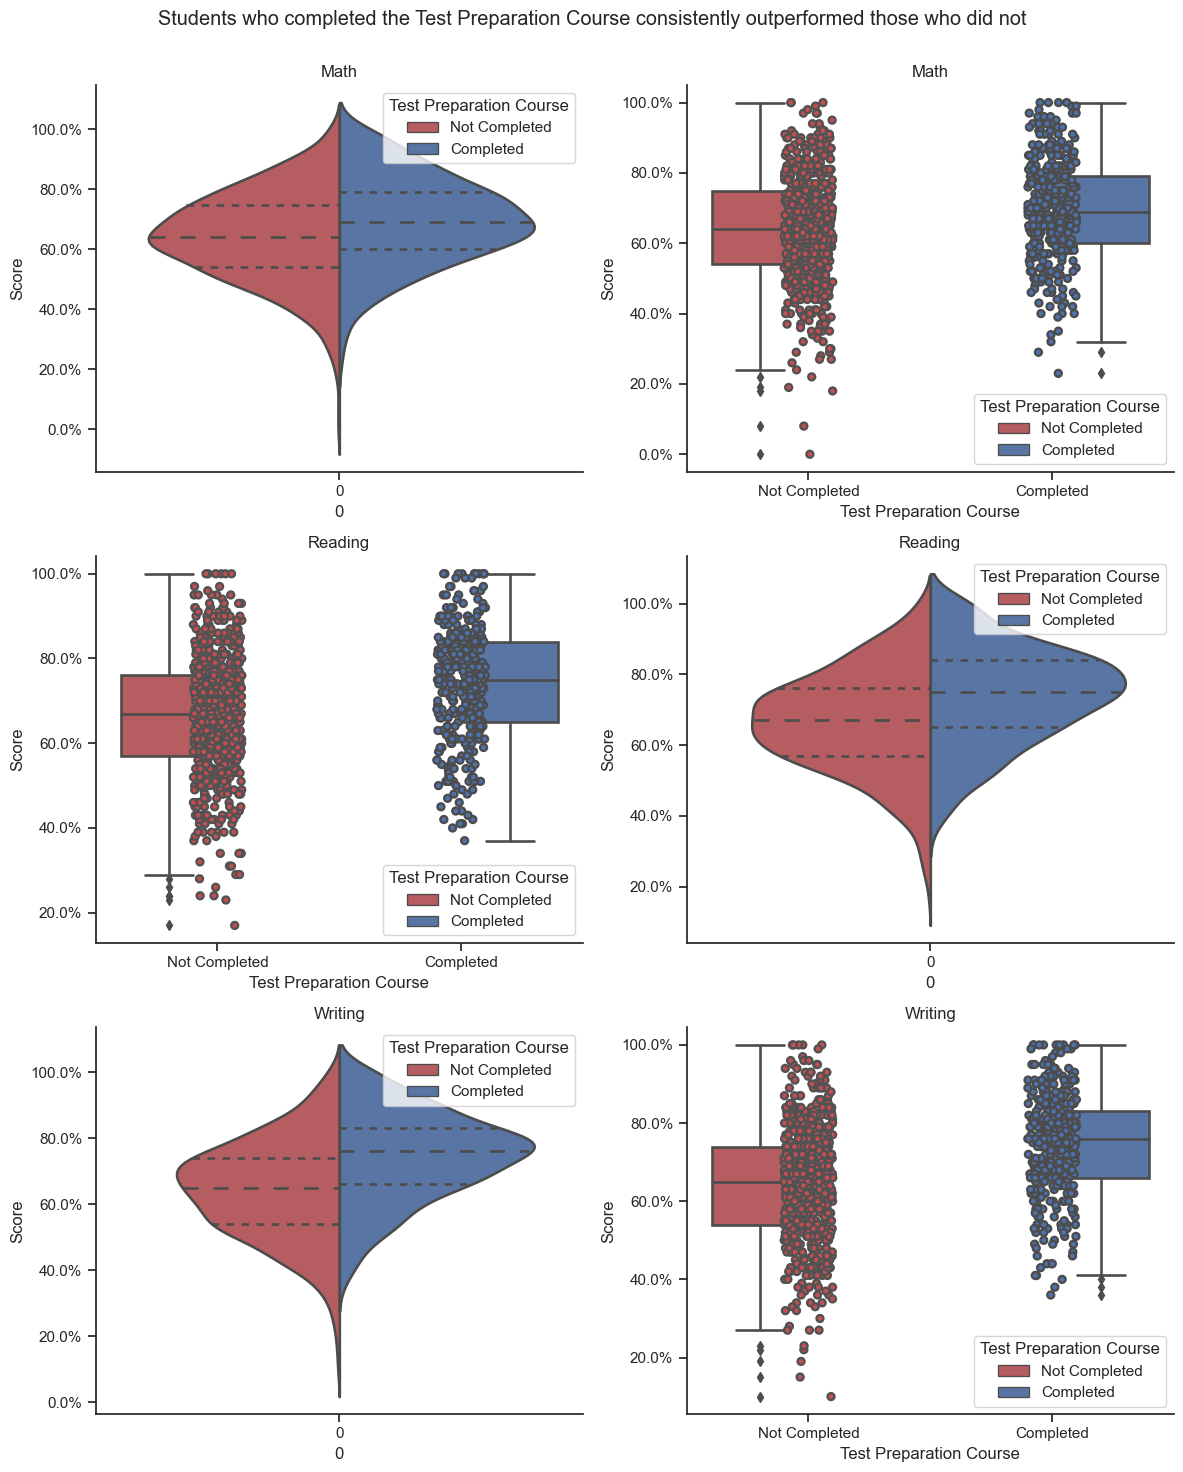

In [9]:
fig, ax = plt.subplots(3, 2, figsize=(12, 15))

ax = ax.flatten()
plot_points = [0,3,4]
for i, sub in enumerate(subjects2):
    if i in plot_points:
        sns.violinplot(data=student_data, x='0', y=sub, ax=ax[i],hue='Test Preparation Course',
                       split=True,inner='quart',palette = custom_palette,)
    else:
        sns.boxplot(data=student_data,x='Test Preparation Course', y=sub, ax=ax[i],
                    hue='Test Preparation Course',palette = custom_palette)
        sns.stripplot(data=student_data,x='Test Preparation Course', y=sub, ax=ax[i],linewidth=1.7,
                    hue='Test Preparation Course',legend=False,palette = custom_palette) 
    ax[i].set_title(f"{sub.split(' ')[0]}")
    ax[i].set_ylabel(f"Score")
    ax[i].yaxis.set_major_formatter(FuncFormatter(percent_formatter)) # To add percentage signs to y axis

fig.suptitle("Students who completed the Test Preparation Course consistently outperformed those who did not")
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


Comparing the students who completed the Test Prep Program to those who did not, it is clear from the visualizations that the former performed better in every subject. **Students who finished the course have higher means than those who did not.** Moreover, the range of values appears to be more strongly impacted by the course's effect. The box plot shows that students who finished the course have a much tighter range of values, especially with a much higher lower bound, which implies this group has *less disparities/variance*. 

This suggests that **those who finished the test-taking course have a lower chance of achieving failing grades than those who did not**. The plots also give the impression that the course seems to have a greater effect in reading and writing than for math. *To get a better understanding, we will examine the differences between the means of students who did and did not complete the course.*


## Differences Between the Means of students between the Test Preparation Groups

In [10]:
for subject in subjects:
    prep_mean = student_data.groupby('Test Preparation Course')[subject].mean()
    print(f"For {subject.split()[0]},the mean score for students who 'completed' the Course was {prep_mean.loc['Completed'].round(2)}%.Those who did not complete the course had {prep_mean.loc['Not Completed'].round(2)}%")

For Math,the mean score for students who 'completed' the Course was 69.7%.Those who did not complete the course had 64.08%
For Reading,the mean score for students who 'completed' the Course was 73.89%.Those who did not complete the course had 66.53%
For Writing,the mean score for students who 'completed' the Course was 74.42%.Those who did not complete the course had 64.5%


It appears that the Test Preparation Course works better in some disciplines than others. In contrast to **math** (5.62%), the differences between the means are noticeably larger for **writing** (9.92%) and **reading** (7.36%).

To ensure that our findings are significant, we will conduct a Two Sample Unpaired T TEST.

## Two Sample Unpaired T TEST

In order to confirm our hypothesis that taking the Test Preparation Course does affect students' performance, we will perform a **Two-Sample Unpaired T Test** to see if the means of the students who took the Test Preparation Course and those who did not are **statistically significant**.



**Null hypothesis** : There is NO statistically significant difference between the means of students who completed and those who did not complete the Test Preparation Course. (i.e The true difference between these group means is zero )

**Alternative Hypothesis**: There IS A statistically significant difference between the means of students who completed and those who did not completed the Test Preparation Course. (i.e The true difference is different from zero.)

The significance level (α) is set at 0.01.


In [11]:
completed_course = student_data.loc[ (student_data['Test Preparation Course'] == 'Completed') ]
not_completed_course = student_data.loc[( student_data['Test Preparation Course'] == 'Not Completed') ]
results = []

for subject in subjects:
    t_test_result = pg.ttest(completed_course[subject], not_completed_course[subject]).round(5) # conduct T TEST
    results.append({
        'Subject': subject,
        'T-Value': t_test_result['T'].values[0],
        'p-Value': t_test_result['p-val'].values[0],
        'Degrees of Freedom': t_test_result['dof'].values[0],
        'Effect Size (Cohen\'s d)': t_test_result['cohen-d'].values[0],
        'Statistical Power': t_test_result['power'].values[0]
    }) # Saves Result
results_student_data = pd.DataFrame(results)
results_student_data

Subject   T-Value  p-Value  Degrees of Freedom  \
0     Math Score   5.78698      0.0           770.07911   
1  Reading Score   8.00413      0.0           775.36936   
2  Writing Score  10.75251      0.0           811.12584   

   Effect Size (Cohen's d)  Statistical Power  
0                  0.37629            0.99991  
1                  0.51923            1.00000  
2                  0.68661            1.00000

**Students who completed the Test Prep Program outperformed those who did not in all subjects.** *Math* displayed a small/moderate effect (Cohen's d = 0.376), while *Reading* showed a medium effect (Cohen's d = 0.519), and *Writing* had a substantial effect (Cohen's d = 0.687). Across all subjects, the null hypothesis was confidently rejected (p < 0.01). This shows  the practical and statistical significance of the observed differences in means. Reading and Writing showed higher practical significance compared to Math, indicating greater effectiveness of the test preparation course in those areas.


## Insights

According to the analysis, it is clear that **taking the Test Preparation Course improves student performance in every subject, but writing and reading show the greatest impact.** Consequently, in order to achieve the best possible academic results, the school should **strongly encourage and promote participation in the Test Preparation Course**, highlighting the benefits it offers in terms of improving reading and writing scores in particular. It could also be even more beneficial to students' performance if additional resources and support are provided to those who may have difficulty gaining access to the program.


# Are there specific student characteristics that influence the effectiveness of the course? Which demographic groups benefit most from the intervention?

Now that we know that the Test Preparation Course does indeed have a discernable effect on student performance, we will focus on analyzing the effectiveness of the course across various factors such as the student's parental level of education and their lunch type, to find out which group benefits the most from the test preparation course that the school provides.



# How does Parental Level of Education affect the effectiveness of the test Preparation Course?

We will start by discovering if **parental level of education affects the effectiveness of the test preparation course.** We will create visualizations to better understand the data, then calculate the differences between the means of students who completed and did not complete the test prep course at different levels of parental education before conducting pairwise t-tests to understand if there exists a statistically significant effect

## Visualizations

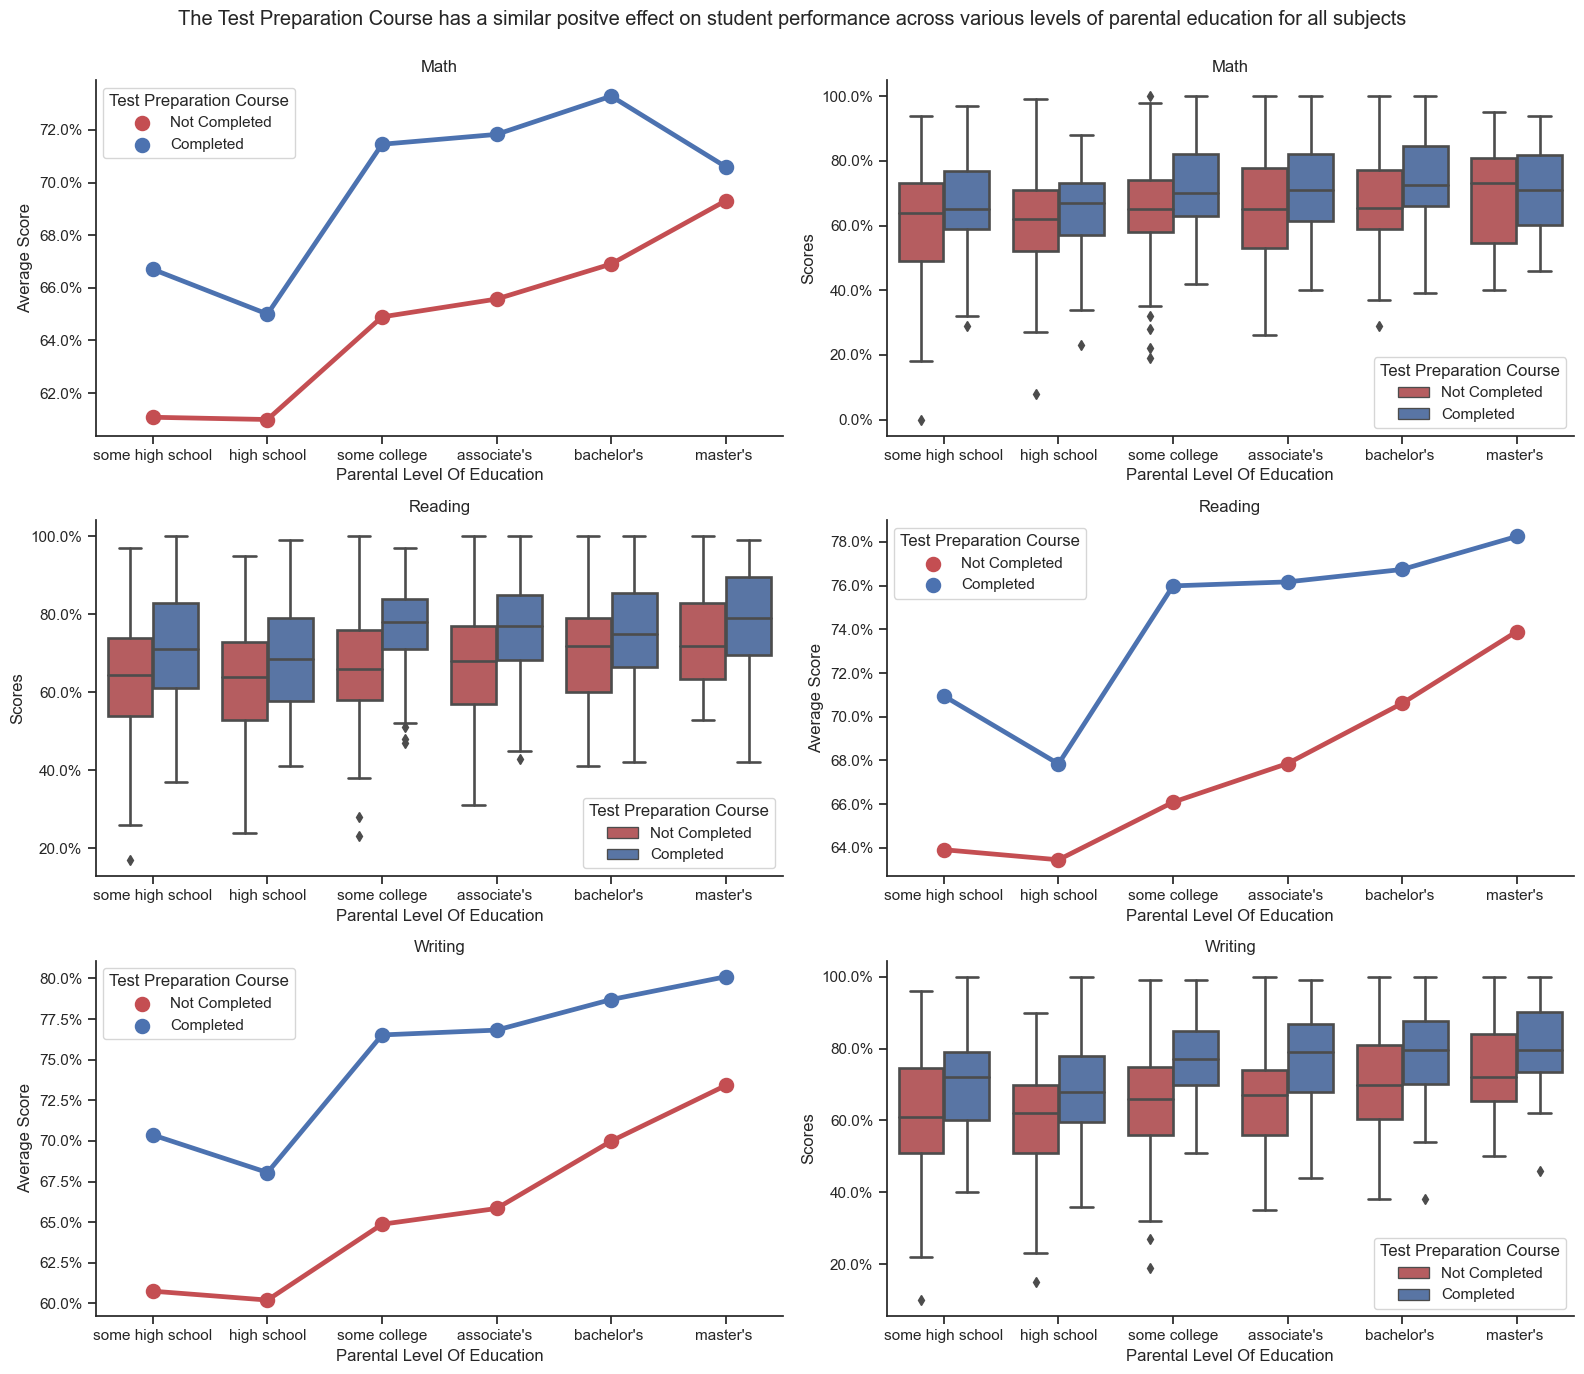

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(16, 14))
ax = ax.flatten()  # Flatten the 2D array of axes for easier iteration
education_levels_no_degree = ['some high school','high school','some college',"associate's ","bachelor's ","master's "]

# Replace the Degree to an empty string, master's degree becomes master's, etc
student_data_no_degree = student_data.copy()
student_data_no_degree['Parental Level Of Education'] = student_data_no_degree['Parental Level Of Education'].str.replace('degree','')
plot_points = [0,3,4] # Where to plot lineplots

for i, score_col in enumerate(subjects2):
    
    # To specify where the lineplot and boxplots should be placed
    if i in plot_points:
        sns.pointplot(data=student_data_no_degree,x='Parental Level Of Education', y=score_col, palette=custom_palette,
                     hue='Test Preparation Course',errorbar=None, ax=ax[i],estimator=np.mean,order=education_levels_no_degree)
        ax[i].set_ylabel(f"Average Score")
    else:
        # Uncomment if you want to see violin plot but comment out the box plot code
#         sns.violinplot(data=student_data_no_degree,x='Parental Level Of Education', y=score_col, palette=custom_palette,
#                      hue='Test Preparation Course', ax=ax[i],order=education_levels_no_degree,split=True,inner='quart')
        sns.boxplot(data=student_data_no_degree,x='Parental Level Of Education', y=score_col, palette=custom_palette,
                     hue='Test Preparation Course', ax=ax[i],order=education_levels_no_degree)
        ax[i].set_ylabel(f"Scores")
    ax[i].set_title(f"{score_col.split(' ')[0]}")
    ax[i].yaxis.set_major_formatter(FuncFormatter(percent_formatter)) 

fig.suptitle("The Test Preparation Course has a similar positve effect on student performance across \
various levels of parental education for all subjects")


plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

For the *line graph*, Each point is located at the intersection of these three factors and conveys the **Level of Education of the Parent**, the **Mean Score** and whether the students took the **Test Preparation Course** or not. 

The visualization shows how the impact of taking the Test Preparation Course on student scores changes based on the different levels of **Parental Education Level.**

The fact that the lines between students who took the test preparation course and those who did not are **parallel** suggests that the impact of the test preparation course remains consistent across different levels of parental education. Therefore on average, **the course has a similar positive effect on student scores for students regardless of their parents' education levels.**

**Students whose parents have higher education levels tend to perform better in all subjects.** The lines for different education levels on the x-axis (e.g., "High School," "College,") show a trend of increasing scores as parental education level increases.

Furthermore, as seen from the box plots, a higher parental education level tends to lead not only to a higher average, but also to a narrower range of values and an elevated lower bound,although there are some exceptions. Students who completed the test prep course similarly exhibit a narrower range and fewer discrepancies compared to their peers with matching levels of parental education. **This suggests that students who successfully finish the test preparation course are less likely to receive lower grades compared to their peers who did not, and this effect is greater the higher the parental level of education.**

**However, we need to find out which group benefits the most from the test prep course and how statistically significant the effect is.** To accomplish this, we will conduct pairwise T Tests. The significance level (α) is set at 0.01, but before that, we will calculate the differences in mean scores between the relevant groups.

## Differences in Mean scores between Test Prep Groups at Various Levels of Parental Education


In [13]:
for subject in subjects:
    # Groups by 'Parental Level Of Education' and 'Test Preparation Course' and calculate mean
    prep_edu_mean = student_data.groupby(['Parental Level Of Education', 'Test Preparation Course'], as_index=False)[subject].mean()
    
    # Filters and sort values for 'Completed' and 'Not Completed'
    comp = prep_edu_mean[prep_edu_mean['Test Preparation Course'] == 'Completed']\
        .sort_values(by='Parental Level Of Education').reset_index(drop=True)
    uncomp = prep_edu_mean[prep_edu_mean['Test Preparation Course'] == 'Not Completed']\
        .sort_values(by='Parental Level Of Education').reset_index(drop=True)
    
    # Calculates the differences in mean and saves it to a dataframe
    prep_edu_dif = pd.DataFrame({
        'Parental Level Of Education': comp['Parental Level Of Education'],
        'Mean Difference': (comp[subject] - uncomp[subject]).round(2)
    }).sort_values(by='Mean Difference',ascending=False)
    
    # Prints results
    print(f'{subject.split()[0].upper()}\n')
    for index, row in prep_edu_dif.iterrows():
        print(f"Students with '{row['Parental Level Of Education']}' educated parents who completed the course scored {row['Mean Difference']}% higher, than those who did not.")
    print('\n')



MATH

Students with 'some college' educated parents who completed the course scored 6.56% higher, than those who did not.
Students with 'bachelor's degree' educated parents who completed the course scored 6.38% higher, than those who did not.
Students with 'associate's degree' educated parents who completed the course scored 6.26% higher, than those who did not.
Students with 'some high school' educated parents who completed the course scored 5.62% higher, than those who did not.
Students with 'high school' educated parents who completed the course scored 4.01% higher, than those who did not.
Students with 'master's degree' educated parents who completed the course scored 1.29% higher, than those who did not.


READING

Students with 'some college' educated parents who completed the course scored 9.9% higher, than those who did not.
Students with 'associate's degree' educated parents who completed the course scored 8.31% higher, than those who did not.
Students with 'some high school' 

This is a lot of information, however, a quick scan reveals that students with "some college" or an "associate's degree" educated parents seem to benefit best from the course, especially for reading and writing. For math, it is students with "some college" and  "bachelor's degree" educated parents benefit best from the course, although "associate's degree" isn't far behind(1.2% difference). **In general, Students with "some college" educated parents or parents who have an "associate's degree"  seem to benefit best from the course while students whose parents are only "high school" educated or have a "masters degree" do not benefit greatly from the course.**. 

Further more, the differences between the means for students who did and did not complete the test preparation course across the levels of parental education are more substantial in Reading and Writing than for Math. This was to be expected, earlier we discovered that the effect of the course is larger in reading and writing than math.

## Pairwise T Tests

In this context, our focus shifts to **investigating whether there exist statistically significant mean differences between students who took the test preparation course and those who did not, across various levels of parental education.**

**Null Hypothesis** : NO significant difference exists between the means of those who completed the test preparation course across the levels of Parental Education.

**Alternate Hypothesis** : A significant difference exists between the means of those who completed the test preparation course across the levels of Parental Education.

In [14]:
# Pairwsie T Tests
pairtest_result_list = []
for subject in subjects:
    pairwisetest_result = student_data.pairwise_tests(dv=subject, between=['Parental Level Of Education','Test Preparation Course'])\
    .round(5)[['Contrast','Parental Level Of Education','A','B','T','hedges','p-unc']] # Conducts the Tests, keeps relevant Information
    
    # Shows where the p value is less than the alpha value and if to reject or Fail to Reject Null hypothesis
    pairwisetest_result['null'] = np.where(pairwisetest_result['p-unc'] >= sig_level,\
                                           'Fail to reject Null Hypothesis','Reject Null Hypothesis')
    
    # Only keep results that contrasts the two groups of Test Prep Course at different Parental Education Levels 
    result = pairwisetest_result[pairwisetest_result['Parental Level Of Education'] != '-'].copy()
    result.loc[:,'Subject'] = subject.split()[0] # Name of subject
    result = result[['Subject','Contrast','Parental Level Of Education','A','B','T','hedges','p-unc','null']]
    pairtest_result_list.append(result)
    
pd.concat(pairtest_result_list).sort_values(by=['Subject','null','hedges'])

Subject                                           Contrast  \
19     Math  Parental Level Of Education * Test Preparation...   
18     Math  Parental Level Of Education * Test Preparation...   
21     Math  Parental Level Of Education * Test Preparation...   
17     Math  Parental Level Of Education * Test Preparation...   
16     Math  Parental Level Of Education * Test Preparation...   
20     Math  Parental Level Of Education * Test Preparation...   
18  Reading  Parental Level Of Education * Test Preparation...   
19  Reading  Parental Level Of Education * Test Preparation...   
17  Reading  Parental Level Of Education * Test Preparation...   
21  Reading  Parental Level Of Education * Test Preparation...   
16  Reading  Parental Level Of Education * Test Preparation...   
20  Reading  Parental Level Of Education * Test Preparation...   
19  Writing  Parental Level Of Education * Test Preparation...   
18  Writing  Parental Level Of Education * Test Preparation...   
17  Writing  Parental Level Of Education * Test Preparation...   
21  Writing  Parental Level Of Education * Test Preparation...   
16  Writing  Parental Level Of Education * Test Preparation...   
20  Writing  Parental Level Of Education * Test Preparation...   

   Parental Level Of Education          A              B        T   hedges  \
19             master's degree  Completed  Not Completed  0.31422  0.08349   
18                 high school  Completed  Not Completed  1.86322  0.27599   
21            some high school  Completed  Not Completed  2.41035  0.35604   
17           bachelor's degree  Completed  Not Completed  2.27023  0.43189   
16          associate's degree  Completed  Not Completed  3.07444  0.42026   
20                some college  Completed  Not Completed  3.35110  0.46712   
18                 high school  Completed  Not Completed  2.02902  0.31169   
19             master's degree  Completed  Not Completed  1.10406  0.31267   
17           bachelor's degree  Completed  Not Completed  2.31018  0.43406   
21            some high school  Completed  Not Completed  3.13100  0.46331   
16          associate's degree  Completed  Not Completed  4.59848  0.62280   
20                some college  Completed  Not Completed  5.55145  0.74315   
19             master's degree  Completed  Not Completed  1.79673  0.49005   
18                 high school  Completed  Not Completed  3.70823  0.57196   
17           bachelor's degree  Completed  Not Completed  3.33244  0.61120   
21            some high school  Completed  Not Completed  4.33865  0.63626   
16          associate's degree  Completed  Not Completed  6.04321  0.82106   
20                some college  Completed  Not Completed  6.44718  0.82992   

      p-unc                            null  
19  0.75496  Fail to reject Null Hypothesis  
18  0.06496  Fail to reject Null Hypothesis  
21  0.01699  Fail to reject Null Hypothesis  
17  0.02554  Fail to reject Null Hypothesis  
16  0.00244          Reject Null Hypothesis  
20  0.00101          Reject Null Hypothesis  
18  0.04494  Fail to reject Null Hypothesis  
19  0.27725  Fail to reject Null Hypothesis  
17  0.02303  Fail to reject Null Hypothesis  
21  0.00205          Reject Null Hypothesis  
16  0.00001          Reject Null Hypothesis  
20  0.00000          Reject Null Hypothesis  
19  0.08035  Fail to reject Null Hypothesis  
18  0.00033          Reject Null Hypothesis  
17  0.00120          Reject Null Hypothesis  
21  0.00002          Reject Null Hypothesis  
16  0.00000          Reject Null Hypothesis  
20  0.00000          Reject Null Hypothesis

**For the majority of Parental Education groups in Reading and Math, we fail to reject the null hypothesis (p > 0.01) indicating that no significant difference exists between the means of those who completed the test preparation course.**

However, we confidently reject the null hypothesis for Reading and Math (p < 0.01) in the case of students whose parents have some college education or an associate's degree.The Hedges’ g, which measures effect size is of medium size which shows us that the actual difference between the groups is important and of practical significance. **Essentially, for reading and math, the Test Preparation Course proves most effective (statistically speaking) this group of students,** aligning with our previous analysis where the most noticeable difference in means was observed in these groups.

Regarding writing, we reject the null hypothesis for almost all groups, except for students whose parents hold a master's degree. We have already discovered that the Test Preparation Course is highly effective in improving writing scores, so the statistical analysis affirms that the course significantly enhances writing scores across various parental education levels. This is in contrast to math and reading, where improvements are limited to specific groups. It is worth noting, that similar to math and reading, the effect size for students whose parents have some college education or an associate's degree is considerably larger than other parental education levels for writing. The effect size(0.82) is large, which shows us the results have practical significance.

**Students with parents holding a master's degree do not exhibit distinct performance differences based on completing the course in Math, Reading, and Writing. This suggests that the test preparation course lacks a statistically significant effect for students with parents at this educational level.**

## **Insights**

To maximize the results of the Test Preparation Course, *XYZ school* should focus more on students whose parents went to college or have an associate's degree. The numbers show that these students improve the most in Reading and Math when they take the course. For Writing, the course helps students improve across different parent education levels, although it is most effective for students whose parents have some college education or have an associate's degree. So, it's a good idea to keep offering the course widely.

Additionally, for students whose parents hold a master's degree or have a high school education, alternative strategies may be explored to enhance their performance, as **the Test Preparation Course appears to have a lesser impact on this demographic.**

# How does *Lunch Type* influence the effectiveness of the Test Preparation Course?
Again, we will start by investigating if **lunch type affects the effectiveness of the test preparation course** by visualizing the data. Then we will calculate the difference between the means of students who completed and did not complete the test prep course at the two different lunch types before conducting pairwise t-tests to understand if there exists a statistically significant effect.

## Visualizations

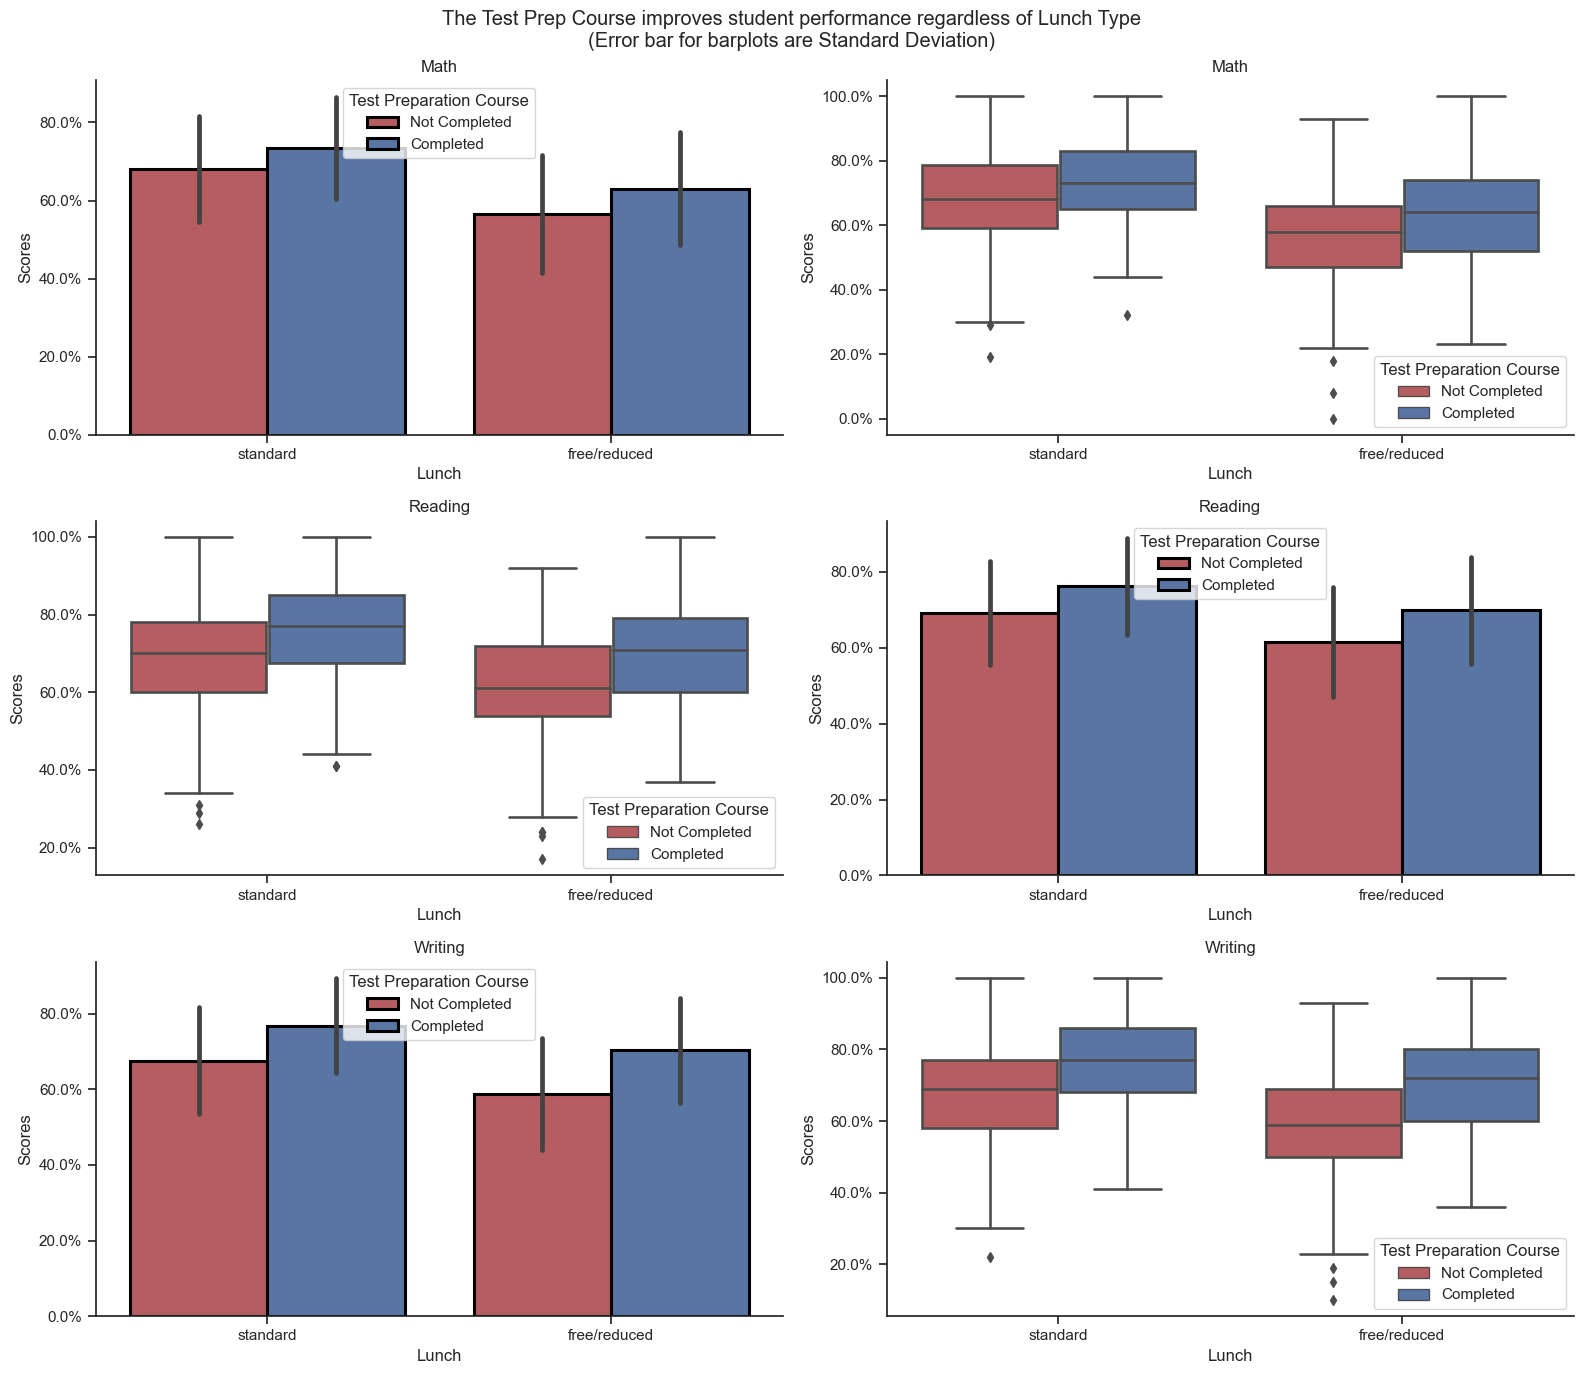

In [15]:
fig, ax = plt.subplots(3, 2, figsize=(16, 14))
ax = ax.flatten()  # Flatten the 2D array of axes for easier iteration and plotting

plot_points = [0,3,4] # Where to plot lineplots

for i, score_col in enumerate(subjects2):
    
    # To specify where the barplot and boxplots should be placed
    if i in plot_points:
        sns.barplot(data=student_data,x='Lunch', y=score_col, palette=custom_palette,estimator='mean',errorbar='sd', edgecolor='black',linewidth=2.2,
        hue='Test Preparation Course', ax=ax[i])
        ax[i].set_ylabel(f"Average Score")
        
    else:
        # Box plot
        sns.boxplot(data=student_data,x='Lunch', y=score_col, palette=custom_palette,
        hue='Test Preparation Course', ax=ax[i])
        
    ax[i].set_title(f"{score_col.split(' ')[0]}")
    ax[i].set_ylabel(f"Scores")
    ax[i].yaxis.set_major_formatter(FuncFormatter(percent_formatter)) 

fig.suptitle("The Test Prep Course improves student performance regardless of Lunch Type\n(Error bar for barplots are Standard Deviation)")
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

The results of the visualization are similar to those of the *Parental Level Of Education*. We can make the following observations. **The Test Prep Course improves student performance regardless of Lunch Type**, however, **the course seems to be more effective for students who took the free lunch, although the difference is quite small.**. Moreover, the course's positive impact on scores is accompanied by a notable reduction in score variance, as evident in the box plots. It is also worth noting that students who took the standard lunch did better than those who took the free lunch at both levels of the Test Prep Course. Let's further examine the differences in means of the relevant groups.

## Differences in Mean scores between Test Prep Groups based on their Lunch type


In [16]:
for subject in subjects:
    # Groups by 'Lunch' and 'Test Preparation Course' and calculate mean
    prep_lunch_mean = student_data.groupby(['Lunch', 'Test Preparation Course'], as_index=False)[subject].mean()
    
    # Filters and sort values for 'Completed' and 'Not Completed'
    comp = prep_lunch_mean[prep_lunch_mean['Test Preparation Course'] == 'Completed'].sort_values(by='Lunch').reset_index(drop=True)
    
    uncomp = prep_lunch_mean[prep_lunch_mean['Test Preparation Course'] == 'Not Completed']\
        .sort_values(by='Lunch').reset_index(drop=True)
    
    # Calculates the differences in mean and saves it to a dataframe
    prep_edu_dif = pd.DataFrame({
        'Lunch': comp['Lunch'],
        'Mean Difference': (comp[subject] - uncomp[subject]).round(2)
    }).sort_values(by='Mean Difference',ascending=False)
    prep_edu_dif['Mean Difference'] = prep_edu_dif['Mean Difference'].astype(str) +'%'
    
    # Prints results
    print(f'{subject.split()[0].upper()}\n')
    for index, row in prep_edu_dif.iterrows():
        print(f"Students with '{row['Lunch']}' type who completed the course scored {row['Mean Difference']} higher, than those who did not.")
    print('\n')



MATH

Students with 'free/reduced' type who completed the course scored 6.54% higher, than those who did not.
Students with 'standard' type who completed the course scored 5.4% higher, than those who did not.


READING

Students with 'free/reduced' type who completed the course scored 8.27% higher, than those who did not.
Students with 'standard' type who completed the course scored 7.04% higher, than those who did not.


WRITING

Students with 'free/reduced' type who completed the course scored 11.61% higher, than those who did not.
Students with 'standard' type who completed the course scored 9.17% higher, than those who did not.




**Students who receive a 'free/reduced' lunch type generally show greater improvement in scores across Math, Reading, and Writing when completing the test preparation course compared to those with a 'standard' lunch,although the difference in Improvement does not seem to be much.** However, to determine the statistical significance of these differences, we will conduct pairwise t-tests. This will help us assess whether the observed variations in scores are substantial or could be due to random chance.

## Pairwise T Tests

Our focus in this context shifts to **investigating whether there exist statistically significant mean differences between students who took the test preparation course and those who did not, based on their Lunch Type**

**Null Hypothesis** : NO significant difference exists between the means of those who completed the test preparation course based on their Lunch Type.

**Alternate Hypothesis** : A significant difference exists between the means of those who completed the test preparation course based on their Lunch Type.

In [17]:
# Pairwsie T Tests

pairtest_result_list = []
for subject in subjects:
    pairwisetest_result = student_data.pairwise_tests(dv=subject, between=['Lunch','Test Preparation Course'])\
    .round(5)[['Contrast','Lunch','A','B','T','hedges','p-unc']] # Conducts the Tests, keeps relevant Information
    
    # Shows where the p value is less than the alpha value and if to reject or Fail to Reject Null hypothesis
    pairwisetest_result['null'] = np.where(pairwisetest_result['p-unc'] >= sig_level,\
                                           'Fail to reject Null Hypothesis','Reject Null Hypothesis')
    
    # Only keep results that contrasts the two groups of Test Prep Course at different Parental Education Levels 
    result = pairwisetest_result[pairwisetest_result['Lunch'] != '-'].copy()
    result.loc[:,'Subject'] = subject.split()[0] # Name of subject
    result = result[['Subject','Contrast','Lunch','A','B','T','p-unc','hedges','null']]
    pairtest_result_list.append(result)
pd.concat(pairtest_result_list)

Subject                         Contrast         Lunch          A  \
2     Math  Lunch * Test Preparation Course  free/reduced  Completed   
3     Math  Lunch * Test Preparation Course      standard  Completed   
2  Reading  Lunch * Test Preparation Course  free/reduced  Completed   
3  Reading  Lunch * Test Preparation Course      standard  Completed   
2  Writing  Lunch * Test Preparation Course  free/reduced  Completed   
3  Writing  Lunch * Test Preparation Course      standard  Completed   

               B        T    p-unc   hedges                    null  
2  Not Completed  4.05016  0.00007  0.43931  Reject Null Hypothesis  
3  Not Completed  4.94727  0.00000  0.40191  Reject Null Hypothesis  
2  Not Completed  5.26408  0.00000  0.57411  Reject Null Hypothesis  
3  Not Completed  6.49559  0.00000  0.52367  Reject Null Hypothesis  
2  Not Completed  7.45075  0.00000  0.80499  Reject Null Hypothesis  
3  Not Completed  8.45254  0.00000  0.67039  Reject Null Hypothesis

The Pairwise T-test results show that, for all subjects (math, reading, and writing), there are statistically significant differences in mean scores between students who completed the test preparation course and those who did not. These differences exist across both lunch types (free/reduced and standard). Every test has extremely low p-values (p < 0.00007), which means that the null hypothesis is always rejected. **This implies that regardless of the kind of lunch students eat, the test preparation course has a major positive effect on their performance.** The effect sizes are larger for students who took the free meal than for those who took the standard meal which means the difference in means between the 'free' group is larger than for standard. However, **the difference in effect sizes is not large.** This aligns with our previous analysis were we calculated the Differences in Mean scores between Test Prep Groups based on their Lunch type

## Insights

The school should not overly worry about promoting taking the Test Preparation Course to students based on their Lunch Type. Although Students who took the 'free/reduced' lunch type generally show greater improvement in scores across all subjects when completing the test preparation course compared to those with a 'standard' lunch, further analysis reveals the differences in the effectiveness of the course does not appear to be substanial enough to use resources to promote taking the course based on Lunch Type.

# Conclusion

In summary, our analysis of **factors influencing the effectiveness of the Test Preparation Course on Student Performance** at *XYZ school* has revealed key things. Taking the Test Preparation Course improves student performance in every subject, but writing and reading show the greatest impact. Consequently, in order to achieve the best possible academic results, the school should strongly encourage and promote participation in the Test Preparation Course

Moreover, we discovered that the educational background of a student's parents plays a role. **The Test Preparation Course is most impactful for students whose parents went to college or have an associate's degree**. However, for students whose parents hold a master's degree or have a high school education, alternative strategies may be explored to enhance their performance, as the Test Preparation Course appears to have a lesser impact on this demographic. 

Lastly, we found that the Test Preparation Course benefits students regardless of their lunch type, be it free or standard. While it appears slightly more beneficial for students with free lunch, both groups see significant improvements. This suggests that the course is contributes positively to improving academic performance of all students regardless of lunch type at *XYZ school*. Therefore, the differences in the effectiveness of the course does not appear to be substanial enough to use resources to promote taking the course based on Lunch Type.